<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/Regression_DT_201023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
TrainPd=pd.read_excel("Concrete_Data.xls")

In [3]:
TrainPd.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete compressive strength Mpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
#Verification des valeur manquantes
TrainPd.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength Mpa                        0
dtype: int64

In [4]:
print("Colonnes disponibles dans le DataFrame :")
print(TrainPd.columns)

Colonnes disponibles dans le DataFrame :
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength Mpa'],
      dtype='object')


In [27]:
  Ytrain=TrainPd["Concrete compressive strength Mpa"];

In [28]:
Ytrain

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength Mpa, Length: 1030, dtype: float64

In [7]:
Xtrain=TrainPd.drop(["Concrete compressive strength Mpa"],axis=1)

In [8]:
Xtrain

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [10]:
Names=list(Xtrain.columns.values)
Names

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)']

In [11]:
from sklearn.model_selection import train_test_split
Xtrain_80, Xtest_20, Ytrain_80, Ytest_20 = train_test_split(Xtrain, Ytrain, test_size=0.20, random_state = 1)

In [12]:
Xtrain_80

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
612,277.00,0.00,0.00,191.00,0.00,968.0,856.00,28
525,359.00,19.00,141.00,154.00,10.91,942.0,801.00,3
597,272.80,181.90,0.00,185.70,0.00,1012.4,714.30,28
846,366.00,187.00,0.00,191.00,7.00,824.0,757.00,28
259,212.57,0.00,100.39,159.35,10.37,1003.8,903.79,3
...,...,...,...,...,...,...,...,...
960,284.00,119.70,0.00,168.30,7.20,970.4,794.20,28
847,280.00,129.00,100.00,172.00,9.00,825.0,805.00,28
715,141.30,212.00,0.00,203.50,0.00,971.8,748.50,90
905,135.00,0.00,166.00,180.00,10.00,961.0,805.00,28


In [13]:
Ytrain_80

612    25.965666
525    25.116626
597    31.381500
846    65.907011
259    13.334466
         ...    
960    40.934880
847    52.820756
715    39.662107
905    13.293097
235    17.836744
Name: Concrete compressive strength Mpa, Length: 824, dtype: float64

In [14]:
Xtest_20

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
339,297.16,0.0,117.54,174.80,9.52,1022.80,753.45,3
244,238.05,0.0,94.11,186.66,7.00,949.91,847.01,3
882,140.00,133.0,103.00,200.00,7.00,916.00,753.00,28
567,203.50,135.7,0.00,185.70,0.00,1076.20,759.30,7
923,162.00,207.0,172.00,216.00,10.00,822.00,638.00,28
...,...,...,...,...,...,...,...,...
258,212.52,0.0,100.37,159.32,8.71,1007.80,903.59,100
551,255.00,0.0,0.00,192.00,0.00,889.80,945.00,3
528,359.00,19.0,141.00,154.00,10.91,942.00,801.00,7
812,310.00,0.0,0.00,192.00,0.00,970.00,850.00,90


In [15]:
Ytest_20

339    21.911547
244    19.932751
882    36.438807
567    11.957582
923    39.844818
         ...    
258    42.919881
551     8.204075
528    38.610656
812    34.680643
50     39.779318
Name: Concrete compressive strength Mpa, Length: 206, dtype: float64

In [29]:
#definition du modele
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor(random_state = 0, max_depth=6)
#Entraînement du modèle sur les données d'apprentissage
Tree_model.fit(Xtrain_80, Ytrain_80)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [17]:
#prediction sur les données de test
Prediction=Tree_model.predict(Xtest_20)
Prediction

array([24.27141569, 13.36662169, 23.82636478, 13.36662169, 32.05224038,
       50.4499858 , 22.09246578, 40.30712401, 37.8125331 , 13.36662169,
       40.30712401, 13.36662169, 40.0267127 , 32.05224038, 13.36662169,
       32.05224038, 40.30712401, 50.4499858 , 63.97785699, 25.68626422,
       25.68626422, 50.4499858 , 15.23042306, 40.0267127 , 59.61362713,
       40.30712401, 40.30712401, 35.68672899, 40.30712401, 13.36662169,
       46.54717593, 59.61362713, 40.30712401, 13.36662169, 39.23807916,
       40.30712401, 13.36662169, 33.49681442, 23.82636478, 13.36662169,
       40.96636567, 15.23042306, 40.0267127 , 40.0267127 , 25.68626422,
       33.23688006, 33.49681442, 23.82636478, 34.10033383, 50.4499858 ,
       33.49681442, 33.49681442, 61.40128518, 46.54717593, 59.61362713,
       13.36662169, 40.96636567, 25.68626422, 23.82636478, 50.4499858 ,
       40.30712401, 46.54717593, 46.54717593, 40.30712401, 33.23688006,
       32.05224038, 61.40128518, 40.0267127 , 65.90804505, 25.68

In [ ]:
# Utilisation de reshape pour transformer le tableau en vecteur colonne
Prediction_column_vector = Prediction.reshape(-1, 1)

# Affichage du vecteur colonne
print(Prediction_column_vector)
Prediction_column_vector.shape

[[24.27141569]
 [13.36662169]
 [23.82636478]
 [13.36662169]
 [32.05224038]
 [50.4499858 ]
 [22.09246578]
 [40.30712401]
 [37.8125331 ]
 [13.36662169]
 [40.30712401]
 [13.36662169]
 [40.0267127 ]
 [32.05224038]
 [13.36662169]
 [32.05224038]
 [40.30712401]
 [50.4499858 ]
 [63.97785699]
 [25.68626422]
 [25.68626422]
 [50.4499858 ]
 [15.23042306]
 [40.0267127 ]
 [59.61362713]
 [40.30712401]
 [40.30712401]
 [35.68672899]
 [40.30712401]
 [13.36662169]
 [46.54717593]
 [59.61362713]
 [40.30712401]
 [13.36662169]
 [39.23807916]
 [40.30712401]
 [13.36662169]
 [33.49681442]
 [23.82636478]
 [13.36662169]
 [40.96636567]
 [15.23042306]
 [40.0267127 ]
 [40.0267127 ]
 [25.68626422]
 [33.23688006]
 [33.49681442]
 [23.82636478]
 [34.10033383]
 [50.4499858 ]
 [33.49681442]
 [33.49681442]
 [61.40128518]
 [46.54717593]
 [59.61362713]
 [13.36662169]
 [40.96636567]
 [25.68626422]
 [23.82636478]
 [50.4499858 ]
 [40.30712401]
 [46.54717593]
 [46.54717593]
 [40.30712401]
 [33.23688006]
 [32.05224038]
 [61.40128

(206, 1)

In [ ]:
# Comparaison des composantes Prediction_column_vector et Ytest_20
#for i in range(len(Ytest_20)):
 #   if Ytest_20[i] == Prediction[i]:
  #      print(f"Les éléments à l'indice {i} sont égaux : Ytest_20[{i}] = {Ytest_20[i]}, prediction[{i}] = {prediction[i]}")
   # else:
    #    print(f"Les éléments à l'indice {i} ne sont pas égaux : Ytest_20[{i}] = {Ytest_20[i]}, prediction[{i}] = {prediction[i]}")

In [ ]:
#Feature importance/importances des caractéristiques (variables) dans le modèle d'arbre de décision
importances=Tree_model.feature_importances_
print (importances*100)

[37.4533943   7.952125    0.74046779  6.67368531  6.28587515  3.48880042
  1.06911611 36.33653591]


In [ ]:
for i in range(Xtrain.shape[1]):
    print((Names[i],  importances[[i]]*100))

('Cement (component 1)(kg in a m^3 mixture)', array([37.4533943]))
('Blast Furnace Slag (component 2)(kg in a m^3 mixture)', array([7.952125]))
('Fly Ash (component 3)(kg in a m^3 mixture)', array([0.74046779]))
('Water  (component 4)(kg in a m^3 mixture)', array([6.67368531]))
('Superplasticizer (component 5)(kg in a m^3 mixture)', array([6.28587515]))
('Coarse Aggregate  (component 6)(kg in a m^3 mixture)', array([3.48880042]))
('Fine Aggregate (component 7)(kg in a m^3 mixture)', array([1.06911611]))
('Age (day)', array([36.33653591]))


In [19]:
from sklearn.metrics import *


In [20]:
print('MAE : ',mean_absolute_error(Ytest_20, Prediction))
print('MSE : ',mean_squared_error(Ytest_20, Prediction))
print('RMSE : ',np.sqrt(mean_squared_error(Ytest_20, Prediction)))
print("R-squared (R²) :", r2_score(Ytest_20, Prediction))

MAE :  5.835833960511405
MSE :  64.1525766146949
RMSE :  8.00953036168132
R-squared (R²) : 0.7539183201385156


In [31]:
y_predict_train = Tree_model.predict(Xtrain_80)
#y_predict_train

In [32]:
print('MAE : ',mean_absolute_error(Ytrain_80, y_predict_train))
print('MSE : ',mean_squared_error(Ytrain_80, y_predict_train))
print('RMSE : ',np.sqrt(mean_squared_error(Ytrain_80, y_predict_train)))
print("R-squared (R²) :", r2_score(Ytrain_80, y_predict_train))

MAE :  4.586557505093523
MSE :  38.15987583600478
RMSE :  6.177368034689594
R-squared (R²) : 0.8649188951881718


In [ ]:
Ytrain_80

612    25.965666
525    25.116626
597    31.381500
846    65.907011
259    13.334466
         ...    
960    40.934880
847    52.820756
715    39.662107
905    13.293097
235    17.836744
Name: Concrete compressive strength Mpa, Length: 824, dtype: float64

In [ ]:
y_predict_train

array([33.49681442, 24.27141569, 40.30712401, 65.90804505, 13.36662169,
       50.4499858 , 33.49681442, 36.83870268, 22.17852224, 40.0267127 ,
       32.25782414, 33.49681442, 50.4499858 , 13.36662169, 59.61362713,
       40.0267127 , 33.49681442, 25.68626422, 13.36662169, 10.00222833,
       40.0267127 , 33.49681442, 22.09246578, 10.63398534, 22.09246578,
       40.0267127 , 46.54717593, 35.68672899, 22.09246578, 20.78144687,
       46.54717593, 66.03145616, 32.05224038, 24.27141569, 10.00222833,
       32.05224038, 40.0267127 , 50.4499858 , 32.05224038, 40.30712401,
       78.15407453, 32.05224038, 78.15407453, 23.82636478, 40.30712401,
       24.27141569, 50.4499858 , 33.49681442, 66.03145616, 13.36662169,
       33.49681442, 40.96636567, 37.8125331 , 10.63398534, 40.30712401,
       46.54717593, 25.68626422, 33.49681442, 23.82636478, 23.97127728,
       13.36662169, 33.49681442, 25.68626422, 13.36662169, 32.05224038,
       23.82636478, 15.32050146, 42.81301222, 66.03145616, 15.23

In [25]:
from sklearn.model_selection import GridSearchCV
hyperparameter = {'max_depth': [4,5,6, 7, 8, 9, 10,11,12]}
Tree_model1 = DecisionTreeRegressor(random_state = 0)
Tree_model1 = GridSearchCV(Tree_model1, hyperparameter)

In [26]:
Tree_model1.fit(Xtrain_80, Ytrain_80)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12]})

In [23]:
Tree_model1.best_params_

{'max_depth': 10}

In [24]:
Prediction=Tree_model1.predict(Xtest_20)
print('MAE : ',mean_absolute_error(Ytest_20, Prediction))
print('MSE : ',mean_squared_error(Ytest_20, Prediction))
print('RMSE : ',np.sqrt(mean_squared_error(Ytest_20, Prediction)))
print("R-squared (R²) :", r2_score(Ytest_20, Prediction))

MAE :  4.636881999264971
MSE :  52.88326981221363
RMSE :  7.27208840789313
R-squared (R²) : 0.7971460452770537


In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
from sklearn import tree

In [ ]:
import pydotplus
from IPython.display import Image

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(Tree_model, out_file=None,
                                feature_names=Names)

In [ ]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

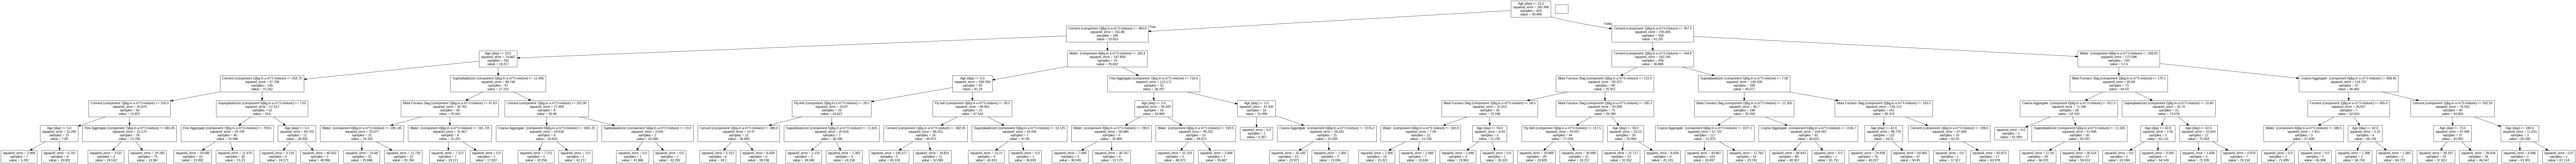

In [ ]:
# Show graph
Image(graph.create_png())

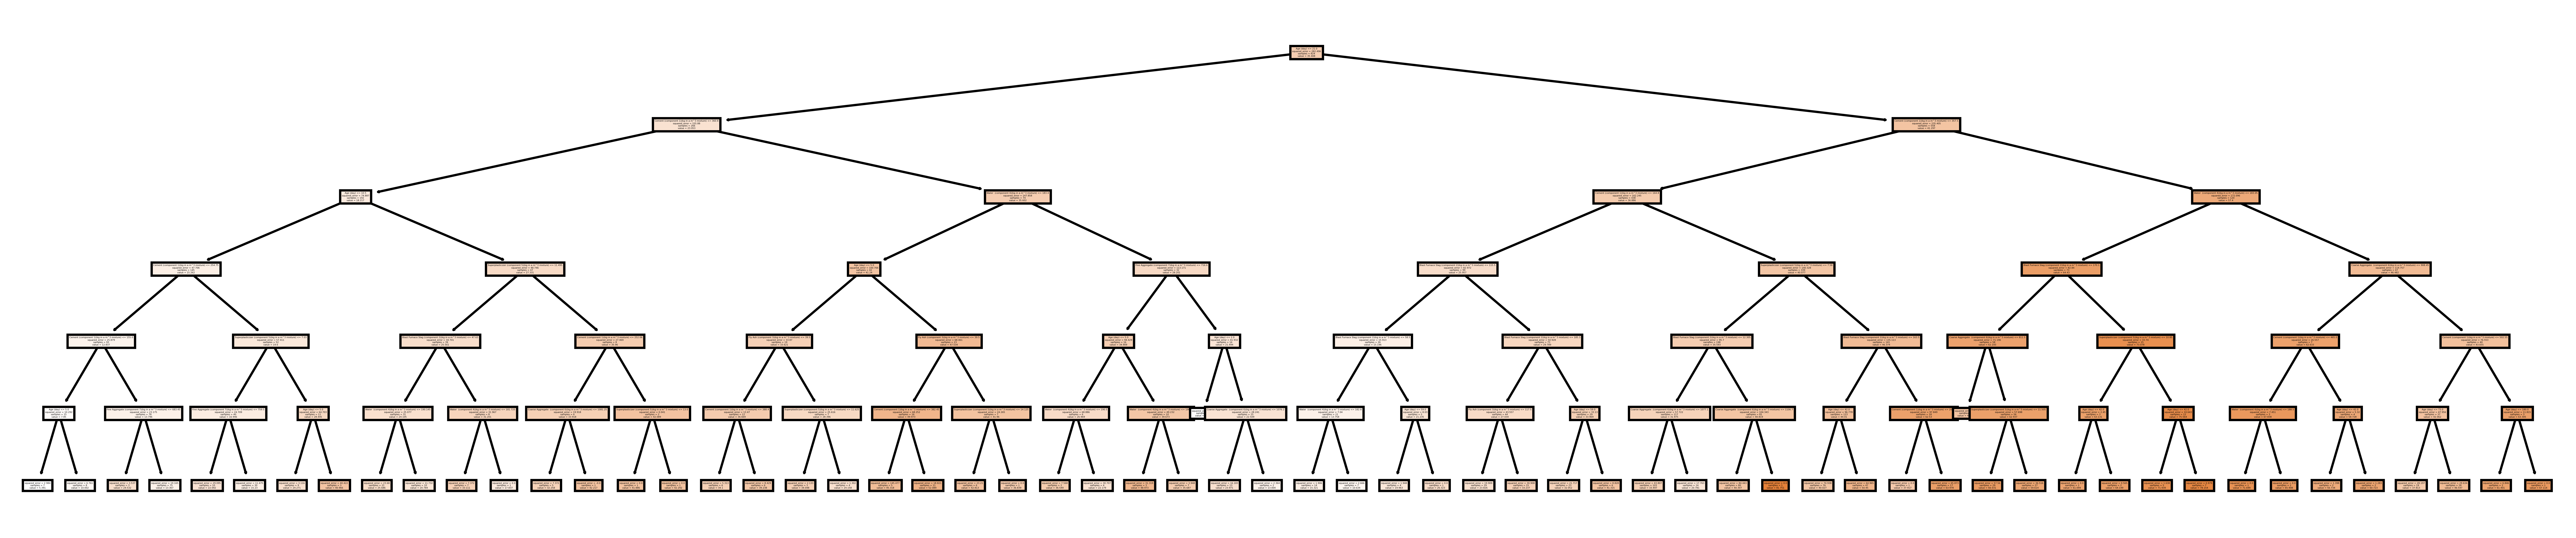

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 5})
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,4), dpi=800)
tree.plot_tree(Tree_model,
               feature_names = Names,
              # class_names=cn,
               filled = True)

fig.savefig('Tree_photo.jpg')

In [ ]:
#test du modele

Prediction=Tree_model.predict([(410,0,0,199,0,1224,854,28)])
Prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([37.8125331])